## Import Libraries

In [5]:
!pip install flask
!pip install Flask-Cors


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: C:\Users\ROG\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


  Using cached Flask_Cors-3.0.10-py2.py3-none-any.whl (14 kB)



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: C:\Users\ROG\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
import warnings
from flask import Flask, request, jsonify, render_template
from flask_cors import cross_origin
import sklearn
import pickle
warnings.filterwarnings("ignore")

## Import Data

In [2]:
df = pd.read_csv('int_prof.csv')
df.head()

,Logical_quotient_rating,i_get_stressed_out_easily,coding_skills_rating,public_speaking_points,i_am_always_prepared,i_follow_a_schedule,i_am_quick_to_understand_things,i_am_full_of_ideas,i_start_conversations,do_you_like_sports,...,tendency_to_worry,self_learning_capability,Extra_courses_did,Taken_inputs_from_seniors_or_elders,reading_and_writing_skills,memory_capability_score,hard_smart_worker,worked_in_teams_ever,Introvert,Suggested_Job_Role
0,8,5,7,7,1,2,7,8,3,no,...,no,yes,yes,no,medium,poor,smart worker,yes,yes,Software Engineer
1,9,2,2,2,5,3,2,2,1,yes,...,no,yes,yes,no,excellent,medium,hard worker,no,no,Software Engineer
2,6,2,1,4,1,0,9,0,4,yes,...,no,no,no,no,excellent,poor,smart worker,yes,yes,Software Engineer
3,1,7,3,7,3,8,9,9,9,no,...,yes,yes,yes,yes,excellent,poor,smart worker,no,yes,Software Engineer
4,7,4,1,0,5,5,8,3,1,no,...,no,no,no,yes,excellent,medium,hard worker,yes,no,Software Engineer


In [3]:
print('Shape of data is: %s entries and %s columns'%(df.shape[0],df.shape[1]))

Shape of data is: 9902 entries and 21 columns


## Data Preprocessing

In [4]:
print("All the columns in the dataset: " , df.columns)

All the columns in the dataset:  Index(['Logical_quotient_rating', 'i_get_stressed_out_easily',
       'coding_skills_rating', 'public_speaking_points',
       'i_am_always_prepared', 'i_follow_a_schedule',
       'i_am_quick_to_understand_things', 'i_am_full_of_ideas',
       'i_start_conversations', 'do_you_like_sports',
       'entrepreneurial_mindset', 'tendency_to_worry',
       'self_learning_capability', 'Extra_courses_did',
       'Taken_inputs_from_seniors_or_elders', 'reading_and_writing_skills',
       'memory_capability_score', 'hard_smart_worker', 'worked_in_teams_ever',
       'Introvert', 'Suggested_Job_Role'],
      dtype='object')


In [5]:
print("Numeric Columns in DF: \n" , df.select_dtypes(include=np.number).columns.tolist())
print("\n\nCategorical Columns in DF: \n" , df.select_dtypes(include=['object']).columns.tolist())

Numeric Columns in DF: 
 ['Logical_quotient_rating', 'i_get_stressed_out_easily', 'coding_skills_rating', 'public_speaking_points', 'i_am_always_prepared', 'i_follow_a_schedule', 'i_am_quick_to_understand_things', 'i_am_full_of_ideas', 'i_start_conversations']


Categorical Columns in DF: 
 ['do_you_like_sports', 'entrepreneurial_mindset', 'tendency_to_worry', 'self_learning_capability', 'Extra_courses_did', 'Taken_inputs_from_seniors_or_elders', 'reading_and_writing_skills', 'memory_capability_score', 'hard_smart_worker', 'worked_in_teams_ever', 'Introvert', 'Suggested_Job_Role']


### No Missing Values

In [6]:
df.isnull().sum(axis=0)

Logical_quotient_rating                0
i_get_stressed_out_easily              0
coding_skills_rating                   0
public_speaking_points                 0
i_am_always_prepared                   0
i_follow_a_schedule                    0
i_am_quick_to_understand_things        0
i_am_full_of_ideas                     0
i_start_conversations                  0
do_you_like_sports                     0
entrepreneurial_mindset                0
tendency_to_worry                      0
self_learning_capability               0
Extra_courses_did                      0
Taken_inputs_from_seniors_or_elders    0
reading_and_writing_skills             0
memory_capability_score                0
hard_smart_worker                      0
worked_in_teams_ever                   0
Introvert                              0
Suggested_Job_Role                     0
dtype: int64

### Uniques Categorical Values in DF

In [7]:
cat_col = df[['do_you_like_sports', 'entrepreneurial_mindset', 'tendency_to_worry', 'self_learning_capability', 'Extra_courses_did', 'Taken_inputs_from_seniors_or_elders', 'reading_and_writing_skills', 'memory_capability_score', 'hard_smart_worker', 'worked_in_teams_ever', 'Introvert', 'Suggested_Job_Role']]
for i in cat_col:
    print(df[i].value_counts(), end="\n\n")

no     4960
yes    4942
Name: do_you_like_sports, dtype: int64

no     4999
yes    4903
Name: entrepreneurial_mindset, dtype: int64

no     5034
yes    4868
Name: tendency_to_worry, dtype: int64

no     4970
yes    4932
Name: self_learning_capability, dtype: int64

yes    5054
no     4848
Name: Extra_courses_did, dtype: int64

no     4957
yes    4945
Name: Taken_inputs_from_seniors_or_elders, dtype: int64

excellent    3338
medium       3285
poor         3279
Name: reading_and_writing_skills, dtype: int64

medium       3333
excellent    3313
poor         3256
Name: memory_capability_score, dtype: int64

smart worker    5060
hard worker     4842
Name: hard_smart_worker, dtype: int64

no     4962
yes    4940
Name: worked_in_teams_ever, dtype: int64

yes    4965
no     4937
Name: Introvert, dtype: int64

Network Security Engineer    1217
Database Developer           1152
Software Engineer            1141
Web Developer                1135
Banker                       1089
Teacher          

- By using binary encoding, categorical features with yes or no can be easily converted to numerical values.

### To check data variety in Suggested_Job_Role column

<AxesSubplot: xlabel='Suggested_Job_Role', ylabel='count'>

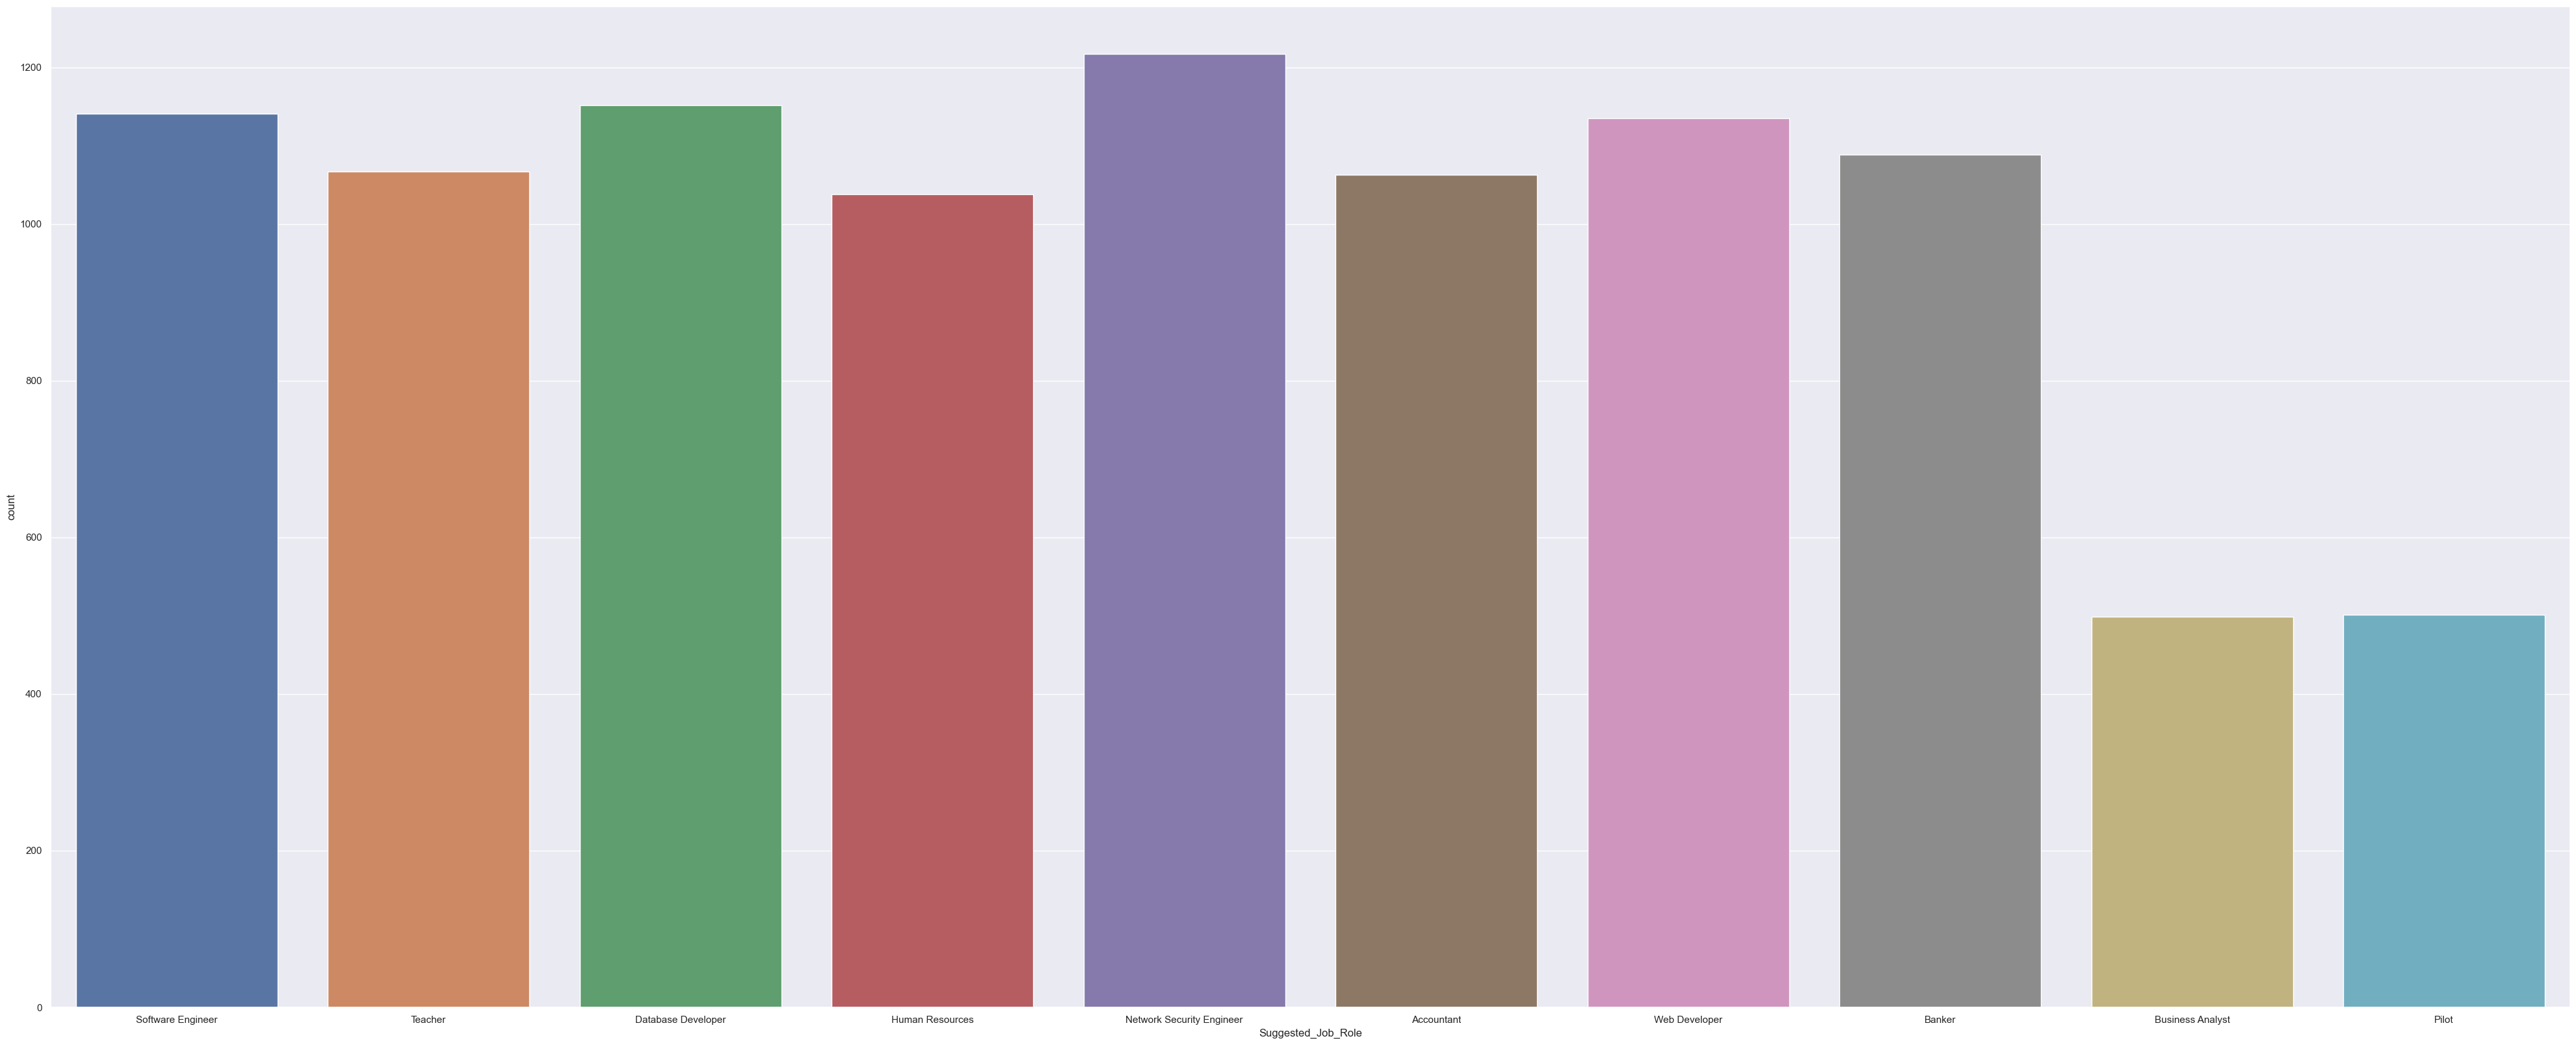

In [8]:
sns.set(rc={'figure.figsize':(50,20)})
sns.countplot(x = df["Suggested_Job_Role"])

## EDA

### Corr Between Numerical Columns

<AxesSubplot: >

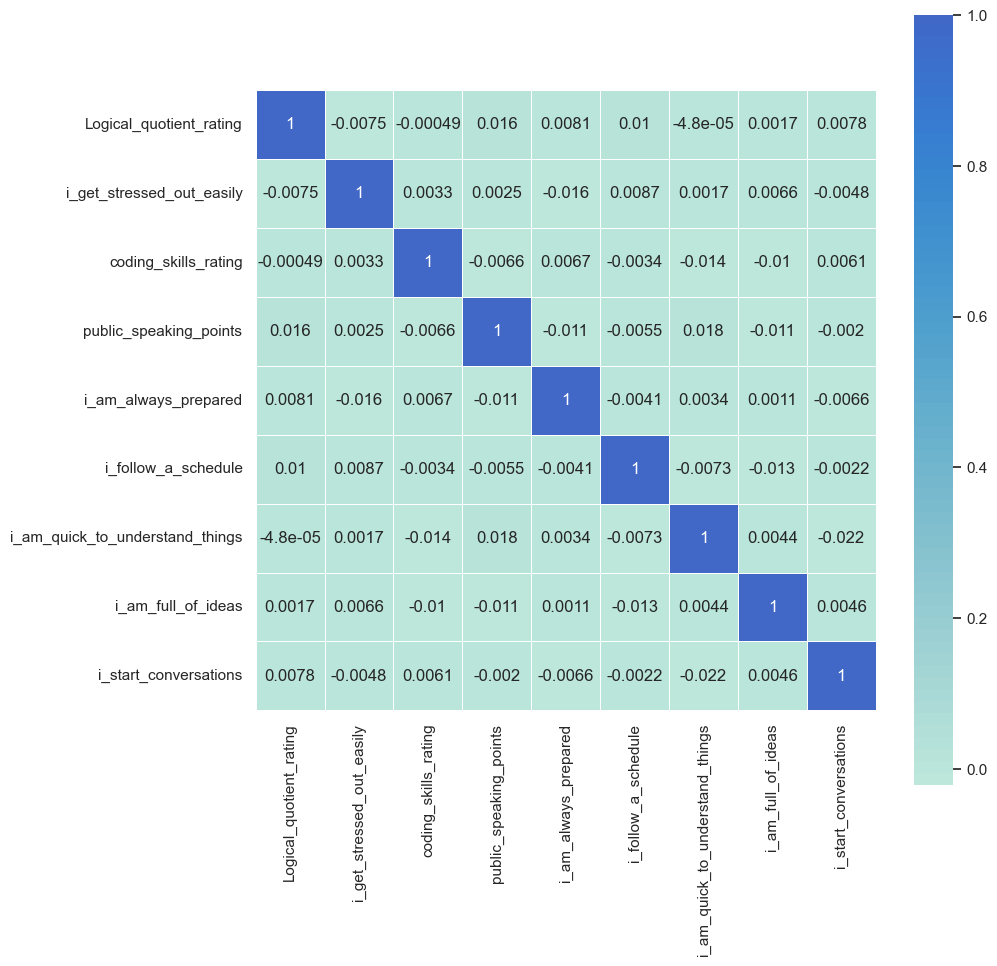

In [9]:
corr = df[['Logical_quotient_rating', 'i_get_stressed_out_easily', 'coding_skills_rating', 'public_speaking_points', 'i_am_always_prepared', 'i_follow_a_schedule', 'i_am_quick_to_understand_things', 'i_am_full_of_ideas', 'i_start_conversations']].corr()
f,axes = plt.subplots(1,1,figsize = (10,10))
sns.heatmap(corr,square=True,annot = True,linewidth = .4,center = 2,ax = axes)

## Visualization for Categorical Values

In [10]:
print(df["Suggested_Job_Role"].value_counts())

Network Security Engineer    1217
Database Developer           1152
Software Engineer            1141
Web Developer                1135
Banker                       1089
Teacher                      1067
Accountant                   1063
Human Resources              1038
Pilot                         501
Business Analyst              499
Name: Suggested_Job_Role, dtype: int64


In [11]:
print(df["Suggested_Job_Role"].value_counts())

Network Security Engineer    1217
Database Developer           1152
Software Engineer            1141
Web Developer                1135
Banker                       1089
Teacher                      1067
Accountant                   1063
Human Resources              1038
Pilot                         501
Business Analyst              499
Name: Suggested_Job_Role, dtype: int64


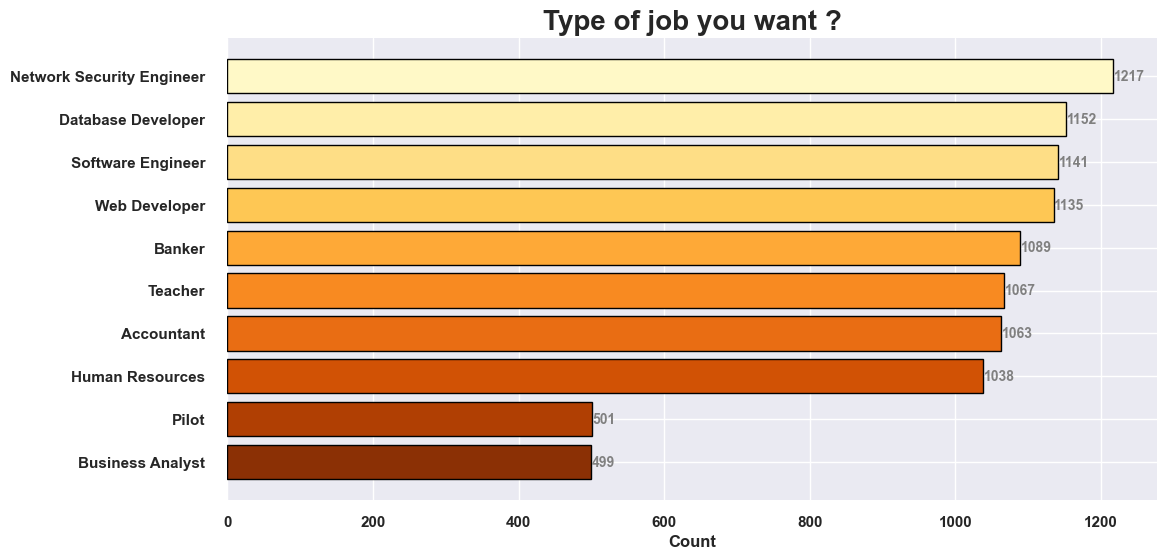

In [12]:
# Figure Size
fig, ax = plt.subplots(figsize=(12,6))

# Horizontal Bar Plot
title_cnt=df["Suggested_Job_Role"].value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1],edgecolor='black', color=sns.color_palette('YlOrBr',len(title_cnt)))



# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)


# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('Type of job you want ?',weight='bold',fontsize=20)
ax.set_xlabel('Count', weight='bold')

# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+1, i.get_y()+0.5, str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')

# Show Plot
plt.show()

In [13]:
print(df["Suggested_Job_Role"].value_counts())

Network Security Engineer    1217
Database Developer           1152
Software Engineer            1141
Web Developer                1135
Banker                       1089
Teacher                      1067
Accountant                   1063
Human Resources              1038
Pilot                         501
Business Analyst              499
Name: Suggested_Job_Role, dtype: int64


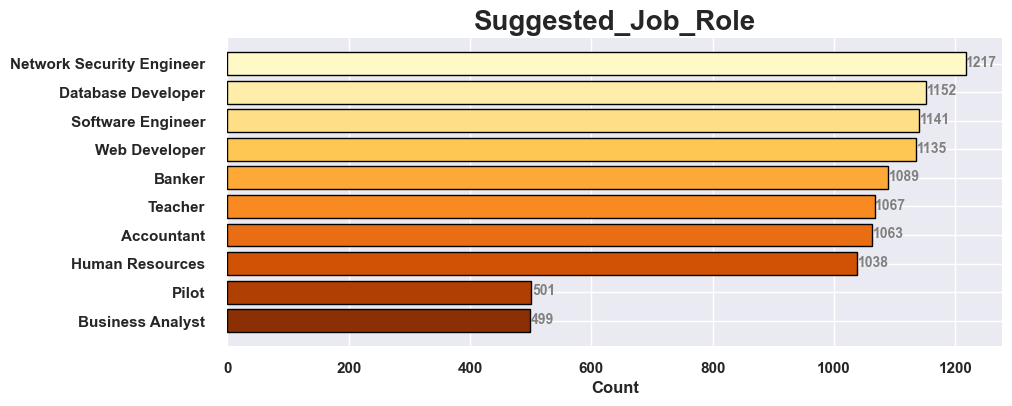

In [14]:
# Figure Size
fig, ax = plt.subplots(figsize=(10,4)) #width,height

# Horizontal Bar Plot
title_cnt=df["Suggested_Job_Role"].value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1],edgecolor='black', color=sns.color_palette('YlOrBr',len(title_cnt)))



# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)


# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('Suggested_Job_Role',weight='bold',fontsize=20)
ax.set_xlabel('Count', weight='bold')

# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+1, i.get_y()+0.5, str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')

# Show Plot
plt.show()

### Checking to see balance in the target variable

<AxesSubplot: xlabel='Suggested_Job_Role', ylabel='count'>

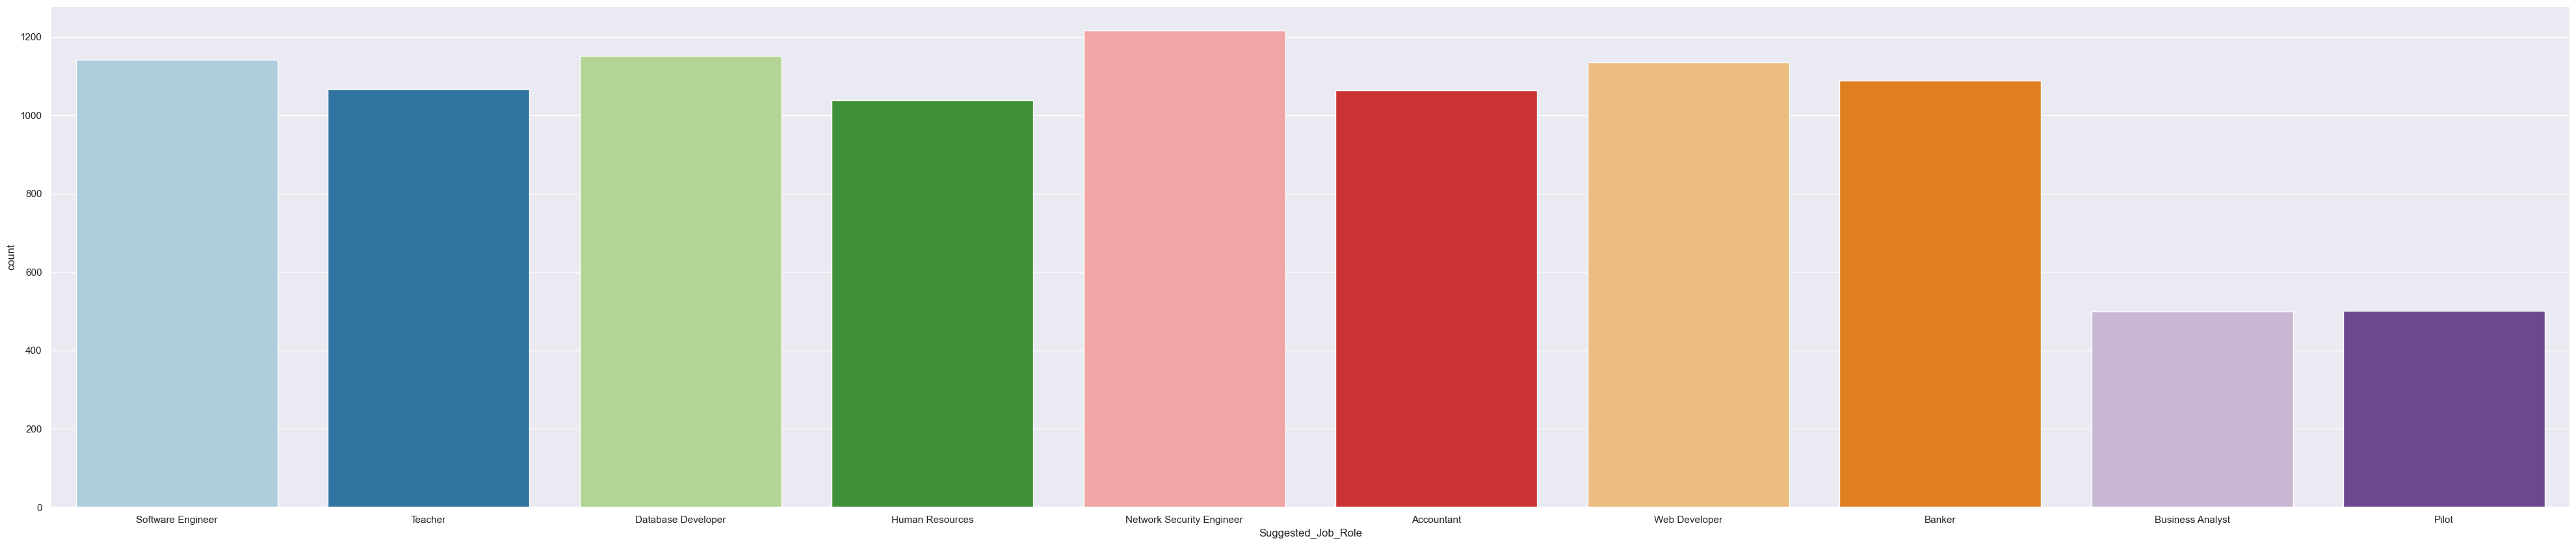

In [15]:
sns.set(rc={'figure.figsize':(50,10)})
sns.countplot(x = df["Suggested_Job_Role"], palette="Paired")

##  Feature Selection & Engineering

### Binary Encoding for Categorical Variables

In [16]:
cols = df[['do_you_like_sports', 'entrepreneurial_mindset', 'tendency_to_worry', 'self_learning_capability', 'Extra_courses_did', 'Taken_inputs_from_seniors_or_elders', 'worked_in_teams_ever', 'Introvert']]
for i in cols:
    cleanup_nums = {i: {"yes": 1, "no": 0}}
    df = df.replace(cleanup_nums)
    df.head()

In [17]:
print("\n\n Categorical Values: \n" , df.select_dtypes(include=['object']).columns.tolist())



 Categorical Values: 
 ['reading_and_writing_skills', 'memory_capability_score', 'hard_smart_worker', 'Suggested_Job_Role']


### One Hot Encoding For Categorical values

In [18]:
mycol = df[["reading_and_writing_skills", "memory_capability_score"]]
for i in mycol:
    cleanup_nums = {i: {"poor": 0, "medium": 1, "excellent": 2}}
    df = df.replace(cleanup_nums)

# cat_col = df[['interested_career_area ', 'Type_of_company_want_to_settle_in', 'Interested_Type_of_Books']]
# for i in cat_col:
#     df[i] = df[i].astype('category')
#     df[i + "_code"] = df[i].cat.codes

print("\n\nList of Categorical values: \n" , df.select_dtypes(include=['object']).columns.tolist())



List of Categorical values: 
 ['hard_smart_worker', 'Suggested_Job_Role']


In [19]:
df.head(5)

,Logical_quotient_rating,i_get_stressed_out_easily,coding_skills_rating,public_speaking_points,i_am_always_prepared,i_follow_a_schedule,i_am_quick_to_understand_things,i_am_full_of_ideas,i_start_conversations,do_you_like_sports,...,tendency_to_worry,self_learning_capability,Extra_courses_did,Taken_inputs_from_seniors_or_elders,reading_and_writing_skills,memory_capability_score,hard_smart_worker,worked_in_teams_ever,Introvert,Suggested_Job_Role
0,8,5,7,7,1,2,7,8,3,0,...,0,1,1,0,1,0,smart worker,1,1,Software Engineer
1,9,2,2,2,5,3,2,2,1,1,...,0,1,1,0,2,1,hard worker,0,0,Software Engineer
2,6,2,1,4,1,0,9,0,4,1,...,0,0,0,0,2,0,smart worker,1,1,Software Engineer
3,1,7,3,7,3,8,9,9,9,0,...,1,1,1,1,2,0,smart worker,0,1,Software Engineer
4,7,4,1,0,5,5,8,3,1,0,...,0,0,0,1,2,1,hard worker,1,0,Software Engineer


###  DV Encoding

In [20]:
# print(df['Non_Technical_or_Technical'].unique())
print(df['hard_smart_worker'].unique())

['smart worker' 'hard worker']


In [21]:
df = pd.get_dummies(df, columns=["hard_smart_worker"], prefix=["B"])
df.head()

,Logical_quotient_rating,i_get_stressed_out_easily,coding_skills_rating,public_speaking_points,i_am_always_prepared,i_follow_a_schedule,i_am_quick_to_understand_things,i_am_full_of_ideas,i_start_conversations,do_you_like_sports,...,self_learning_capability,Extra_courses_did,Taken_inputs_from_seniors_or_elders,reading_and_writing_skills,memory_capability_score,worked_in_teams_ever,Introvert,Suggested_Job_Role,B_hard worker,B_smart worker
0,8,5,7,7,1,2,7,8,3,0,...,1,1,0,1,0,1,1,Software Engineer,0,1
1,9,2,2,2,5,3,2,2,1,1,...,1,1,0,2,1,0,0,Software Engineer,1,0
2,6,2,1,4,1,0,9,0,4,1,...,0,0,0,2,0,1,1,Software Engineer,0,1
3,1,7,3,7,3,8,9,9,9,0,...,1,1,1,2,0,0,1,Software Engineer,0,1
4,7,4,1,0,5,5,8,3,1,0,...,0,0,1,2,1,1,0,Software Engineer,1,0


In [22]:
df.to_csv('enccoded_dataframe.csv')

In [23]:
print("List of Numerical values: \n" , df.select_dtypes(include=np.number).columns.tolist())

List of Numerical values: 
 ['Logical_quotient_rating', 'i_get_stressed_out_easily', 'coding_skills_rating', 'public_speaking_points', 'i_am_always_prepared', 'i_follow_a_schedule', 'i_am_quick_to_understand_things', 'i_am_full_of_ideas', 'i_start_conversations', 'do_you_like_sports', 'entrepreneurial_mindset', 'tendency_to_worry', 'self_learning_capability', 'Extra_courses_did', 'Taken_inputs_from_seniors_or_elders', 'reading_and_writing_skills', 'memory_capability_score', 'worked_in_teams_ever', 'Introvert', 'B_hard worker', 'B_smart worker']


## Machine Learning Models to get best accuracy

In [25]:
feed = df[['Logical_quotient_rating', 'i_get_stressed_out_easily', 'coding_skills_rating', 'public_speaking_points', 'i_am_always_prepared', 'i_follow_a_schedule', 'i_am_quick_to_understand_things', 'i_am_full_of_ideas', 'i_start_conversations', 'do_you_like_sports', 'entrepreneurial_mindset', 'tendency_to_worry', 'self_learning_capability', 'Extra_courses_did', 'Taken_inputs_from_seniors_or_elders', 'reading_and_writing_skills', 'memory_capability_score', 'worked_in_teams_ever', 'Introvert', 'B_hard worker', 'B_smart worker','Suggested_Job_Role']]

# Choosing independent vars
df_train_x = feed.drop('Suggested_Job_Role',axis = 1)

# Choosing all target vars
df_train_y = feed['Suggested_Job_Role']

x_train, x_test, y_train, y_test = train_test_split(df_train_x, df_train_y, test_size=0.10, random_state=42)

In [26]:
y_train = pd.DataFrame(y_train, columns = ["Suggested_Job_Role"])
y_train.head()
y_test = pd.DataFrame(y_test, columns = ["Suggested_Job_Role"])
y_test

,Suggested_Job_Role
3058,Network Security Engineer
8188,Banker
1509,Database Developer
4993,Accountant
9493,Pilot
...,...
2588,Network Security Engineer
4181,Database Developer
5106,Accountant
1372,Database Developer


### Machine Learning Model Fittings

### 1. Decision Tree


In [27]:
dtree = DecisionTreeClassifier(random_state=1)
dtree = dtree.fit(x_train, y_train)

y_pred = dtree.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("confusion matrics=",cm)
print("  ")
print("accuracy=",accuracy*10)

confusion matrics= [[12  5  3 14 14 15  6  9 12 12]
 [13 10  6 14  9 13  7 13  6  7]
 [ 4  3  2  7  7  8  2  4  3  4]
 [ 8 11  6  7 13 13 11 10  7 17]
 [ 8 10  5 14  5  9  8 11 12 11]
 [17 13  8 16 16 19  6 12 11 13]
 [ 5  9  4  7  8 10  2  8  5  1]
 [ 9 10 14 15 13 19  9 20 13  9]
 [20  9  6 14 13 12  4 12  7 10]
 [17 14  6 14 16 13  5 12  9 17]]
  
accuracy= 1.0191725529767912


### Data for single instance prediction

In [37]:
userdata = [['1','1','1','2','1','1','1','2','1','1','1','1','1','1','1','1','1','1','1','1','1']]
ynewclass = dtree.predict(userdata)
ynew = dtree.predict_proba(userdata)
print(ynewclass)
print("Probabilities of all classes: ", ynew)
print("Probability of Predicted class : ", np.max(ynew))

['Database Developer']
Probabilities of all classes:  [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
Probability of Predicted class :  1.0


K-Fold Cross Validation

In [33]:
from sklearn.model_selection import cross_val_score
dtree = DecisionTreeClassifier(random_state=1)
scores = cross_val_score(dtree, x_train, y_train, cv = 10)
scores

array([0.05496354, 0.0617284 , 0.05387205, 0.05611672, 0.04713805])

In [36]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean()*10, scores.std()))

0.55 accuracy with a standard deviation of 0.00


### Support Vector Machine

In [32]:
from sklearn import svm
svm = svm.SVC()
svm.fit(x_train, y_train)
svm_y_pred = svm.predict(x_test)
svm_cm = confusion_matrix(y_test,svm_y_pred)
svm_accuracy = accuracy_score(y_test,svm_y_pred)
print("confusion matrics=",svm_cm)
print("  ")
print("accuracy=",svm_accuracy*10)

confusion matrics= [[ 0  1  0  1  3  0  0  2 10  0  5  4  6  2  0  0  4  5]
 [ 0  0  0  2  4  1  0  1 20  0 11  5  7  1  0  2  9  6]
 [ 0  0  0  0  9  1  2  1 11  0  5  3  3  1  0  3  5  3]
 [ 0  0  0  0  4  1  2  0 13  0  2  3  8  2  0  3  3  3]
 [ 0  0  0  2  3  1  0  0 15  0  9  6  4  1  0  2  6  7]
 [ 0  1  0  0  1  5  0  0 22  0  3  5  6  2  0  1  3  5]
 [ 0  0  1  0  7  0  0  0 14  0  6  7  3  1  0  1  2  4]
 [ 0  0  0  0  4  2  0  0 16  0  1  7  2  5  0  2  7  1]
 [ 0  0  0  1  6  1  1  0 23  0  5  3  8  2  0  2 10  5]
 [ 0  0  0  0  5  4  0  1 26  0  6  4  2  0  0  1  5  5]
 [ 0  0  0  3  7  0  0  0 14  0  6 11  4  2  0  3  8  6]
 [ 0  0  0  1  4  2  1  1 24  0  2  4  4  3  0  1  5 10]
 [ 0  0  0  2  3  1  0  2 16  0  2  6  6  0  0  4  3  4]
 [ 0  0  0  0  8  1  0  0 20  0  1  6  5  3  0  1  9  5]
 [ 0  0  1  2  4  3  0  0 16  0  3  4  6  0  0  2  5  5]
 [ 0  0  0  2  6  2  3  0 14  0  4 10  3  1  0  2 12  4]
 [ 0  0  0  3  4  1  0  1 14  0  3  5  6  3  0  3  5  3]
 [ 0  0  1  

### K-Fold Cross Validation

In [37]:
from sklearn import svm
svm = svm.SVC()
scores = cross_val_score(svm, x_train, y_train, cv = 10)
scores

array([0.05776781, 0.06060606, 0.05218855, 0.05948373, 0.07856341])

In [38]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean()*10, scores.std()))

0.62 accuracy with a standard deviation of 0.01


### Random Forest Classifier

In [39]:
rf = RandomForestClassifier(random_state = 1)
rf.fit(x_train, y_train)
rfc_y_pred = rf.predict(x_test)
rfc_cm = confusion_matrix(y_test,rfc_y_pred)
rfc_accuracy = accuracy_score(y_test,rfc_y_pred)
print("confusion matrics=",rfc_cm)
print("  ")
print("accuracy=",rfc_accuracy*10)

confusion matrics= [[ 2  2  2  1  4  2  1  5  2  2  1  0  3  2  2  8  4  0]
 [ 3  6  2  4  5  8  4  5  8  1  3  1  4  2  2  6  4  1]
 [ 2  2  3  1  5  5  3  2  3  2  1  2  2  3  1  4  4  2]
 [ 0  4  0  1  4  6  2  2  3  3  3  4  2  3  0  4  1  2]
 [ 5  4  4  2  5  2  3  5  5  2  2  6  2  1  2  2  3  1]
 [ 2  5  2  2  4  8  2  4  2  0  6  2  2  4  0  5  3  1]
 [ 2  6  3  2  3  1  2  1  7  0  2  2  6  2  2  1  3  1]
 [ 1  6  0  3  6  1  3  5  5  1  2  5  0  4  1  1  2  1]
 [ 2  2  4  4  5  4  3  2  6  1  6  2  5  5  2  3  4  7]
 [ 1  5  4  1  2  3  4  6  5  4  1  5  2  2  6  2  3  3]
 [ 1  2  0  5  7  5  3  2  5  4  6  7  3  4  2  3  3  2]
 [ 5  3  2  2  4  3  1  2 10  5  5  3  5  2  2  0  5  3]
 [ 2  2  2  2  5  5  0  2  4  5  2  4  1  3  2  5  1  2]
 [ 4  4  0  2  4  5  2  2  7  1  5  6  7  2  0  2  6  0]
 [ 4  3  3  1  6  5  1  4  5  2  4  1  1  1  1  4  2  3]
 [ 4  7  2  6  4  4  5  2  3  2  5  4  5  3  1  2  1  3]
 [ 4  3  4  0  4  7  2  2  1  3  4  5  2  2  1  1  2  4]
 [ 2  1  4  

K-Fold Cross Validation

In [41]:
rf = RandomForestClassifier(random_state = 1)
scores = cross_val_score(rf, x_train, y_train, cv = 10)
scores

array([0.06278027, 0.07070707, 0.0684624 , 0.04713805, 0.04489338,
       0.05611672, 0.0684624 , 0.04826038, 0.0684624 , 0.05948373])

In [42]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean()*10, scores.std()))

0.59 accuracy with a standard deviation of 0.01


### XGBOOST

In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [44]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state = 1, learning_rate=0.02, n_estimators=300)
xgb.fit(X = x_train,y =  y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.02, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=300, n_jobs=0,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto', ...)

In [45]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = xgb.predict(x_test)
y_pred = le.inverse_transform(y_pred)
cm = confusion_matrix(y_test, y_pred)
xgb_accuracy = accuracy_score(y_test, y_pred)
print("confusion matrics=",cm)
print("  ")
print("accuracy=",xgb_accuracy*10)

confusion matrics= [[ 2  0  3  2  3  3  3  2  5  1  4  3  2  3  1  2  3  1]
 [ 3  5  0  2  4 10  3  4  4  0 11  5  2  2  4  2  6  2]
 [ 2  2  4  2  3  1  1  2  4  3  5  3  3  2  1  3  2  4]
 [ 2  2  1  5  3  4  4  2  1  1  3  2  5  1  2  1  2  3]
 [ 3  3  2  3  6  1  0  0  7  1  4  4  4  1  2  2  6  7]
 [ 0  2  0  2  3 10  3  3  4  1  6  3  2  5  1  2  2  5]
 [ 2  2  3  1  1  3  0  4  8  1  3  0  3  2  2  2  4  5]
 [ 0  2  1  0  1  6  3  3  4  2  1  6  6  1  2  5  3  1]
 [ 2  4  2  2  1  3  5  3  4  1  9  6  6  2  3  4  4  6]
 [ 4  3  4  2  4  6  2  2  7  3  7  1  3  2  1  2  1  5]
 [ 1  5  2  4  8  3  3  3  5  2  8  6  1  2  0  4  6  1]
 [ 2  3  0  2  7  2  2  4  7  4  4  3  4  3  2  3  5  5]
 [ 1  2  0  1  3  5  3  1  3  1  2  5  6  0  2  5  6  3]
 [ 2  4  2  3  0  3  5  4  8  0  4  3  4  5  2  4  4  2]
 [ 3  5  1  2  2  2  2  3  4  0  3  1  3  4  2  3  6  5]
 [ 2  8  4  7  3  6  1  3  5  1  6  3  0  2  2  6  3  1]
 [ 2  1  4  1  3  4  1  4  4  2  5  6  2  1  2  7  0  2]
 [ 1  5  1  

K-Fold Cross Validation

In [46]:
xgb = XGBClassifier(random_state = 1, learning_rate=0.02, n_estimators=300)
scores = cross_val_score(xgb, x_train, y_train, cv = 10)
scores

array([0.06053812, 0.05836139, 0.05499439, 0.05836139, 0.06734007,
       0.05162738, 0.06060606, 0.05162738, 0.04826038, 0.04826038])

In [47]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean()*10, scores.std()))

0.56 accuracy with a standard deviation of 0.01


### K-Nearest Neighbors

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

In [52]:
knn_accuracy = accuracy_score(y_test, y_pred)
print("accuracy = ", knn_accuracy*10)
knn_classification_report = classification_report(y_test, y_pred)
print("Classification Report: \n" , knn_classification_report)
knn_cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ", knn_cm)

accuracy =  0.5247225025227044
Classification Report: 
                                            precision    recall  f1-score   support

                               Accountant       0.04      0.09      0.06        43
                   Applications Developer       0.05      0.06      0.05        69
                                   Banker       0.06      0.09      0.07        47
                         Business Analyst       0.05      0.07      0.06        44
                  CRM Technical Developer       0.03      0.05      0.04        56
                       Database Developer       0.07      0.09      0.08        54
                          Human Resources       0.06      0.09      0.07        46
            Mobile Applications Developer       0.02      0.02      0.02        47
                Network Security Engineer       0.11      0.12      0.12        67
                                    Pilot       0.03      0.02      0.02        59
                       Softwar

K-Fold Cross Validation

In [53]:
knn = KNeighborsClassifier(n_neighbors=12)
scores = cross_val_score(knn, x_train, y_train, cv = 10)
scores

array([0.06390135, 0.0650954 , 0.0684624 , 0.05162738, 0.04826038,
       0.0650954 , 0.04826038, 0.05836139, 0.04377104, 0.05387205])

In [54]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean()*10, scores.std()))

0.57 accuracy with a standard deviation of 0.01


### Naive Bayes

In [55]:
gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(x_test)
gnb_accuracy = accuracy_score(y_test, y_pred)
print("accuracy = ", gnb_accuracy*10)
gnb_cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ", gnb_cm)

accuracy =  0.5953582240161452
Confusion Matrix:  [[ 1  4  0  1  2  5  2  3  7  0  4  3  4  0  2  0  1  4]
 [ 1  1  4  4  3  6  1  4 15  1  9  5  3  0  4  1  3  4]
 [ 0  3  3  0  3  6  1  3  6  0  4  6  5  3  2  2  0  0]
 [ 0  1  0  0  3  5  7  5  1  0  1  4  7  0  1  0  1  8]
 [ 0  1  0  0  2  4  2  1  8  0  5  8  6  3  3  5  4  4]
 [ 0  2  1  0  1  6  6  6  6  0  5  5  3  3  2  1  4  3]
 [ 0  3  1  0  3  3  0  1 13  0  6  8  0  0  4  2  0  2]
 [ 0  4  1  1  4  2  1  2  9  0  3  6  2  3  3  1  3  2]
 [ 0  4  1  3  0  5  3  3 11  0  4  6  5  3  4  5  5  5]
 [ 1  6  0  0  3  2  7  5  8  1  4  4  3  0  1  6  4  4]
 [ 0  1  1  0  3  3  2  3  8  1  4 12  2  2  2  9  8  3]
 [ 2  2  0  0  4  1  4  3 11  1  4  8  4  2  4  1  2  9]
 [ 0  1  2  2  4  3  2  2  4  0  5  2  8  0  4  3  2  5]
 [ 0  6  0  0  6  2  4  4  7  0  5  9  5  3  0  3  3  2]
 [ 0  1  1  0  4  7  1  2 12  0  3  6  6  2  4  0  0  2]
 [ 3  3  1  1  0  7  0  5  7  0 11  8  3  1  3  1  6  3]
 [ 0  2  0  2  1  4  3  4  7  0  4  6 

K-Fold Cross Validation

In [56]:
gnb = GaussianNB()
scores = cross_val_score(gnb, x_train, y_train, cv = 5)
scores

array([0.06281548, 0.04882155, 0.06397306, 0.05667789, 0.06228956])

In [57]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean()*10, scores.std()))

0.59 accuracy with a standard deviation of 0.01


# Model Evaluations

## ROC Curves

In [59]:
from sklearn.metrics import RocCurveDisplay

### ROC Curve for Random Forest

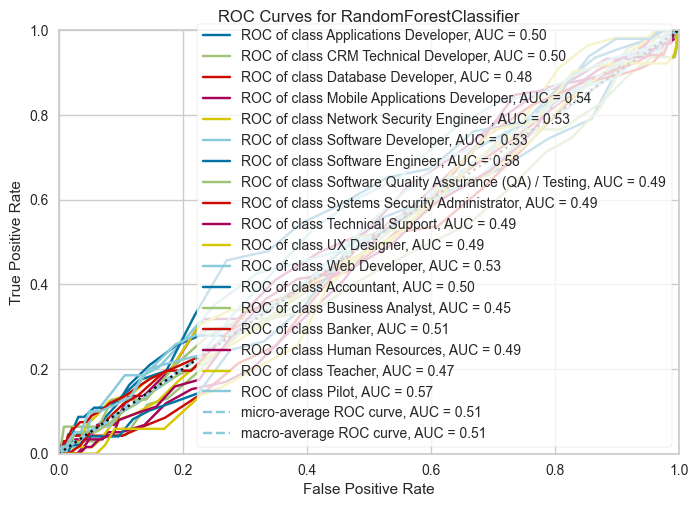

ROCAUC(ax=<AxesSubplot: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       classes=['Applications Developer', 'CRM Technical Developer',
                'Database Developer', 'Mobile Applications Developer',
                'Network Security Engineer', 'Software Developer',
                'Software Engineer',
                'Software Quality Assurance (QA) / Testing',
                'Systems Security Administrator', 'Technical Support',
                'UX Designer', 'Web Developer', 'Accountant',
                'Business Analyst', 'Banker', 'Human Resources', 'Teacher',
                'Pilot'],
       estimator=RandomForestClassifier(n_estimators=300, random_state=1))

In [63]:
from yellowbrick.classifier.rocauc import roc_auc
rfc = RandomForestClassifier(n_estimators = 300, random_state = 1)
roc_auc(rfc, x_train, y_train, X_test = x_test, y_test = y_test, classes =['Applications Developer', 'CRM Technical Developer','Database Developer','Mobile Applications Developer','Network Security Engineer','Software Developer','Software Engineer','Software Quality Assurance (QA) / Testing','Systems Security Administrator','Technical Support','UX Designer','Web Developer','Accountant','Business Analyst','Banker','Human Resources','Teacher','Pilot'])

### ROC for Decision Tree

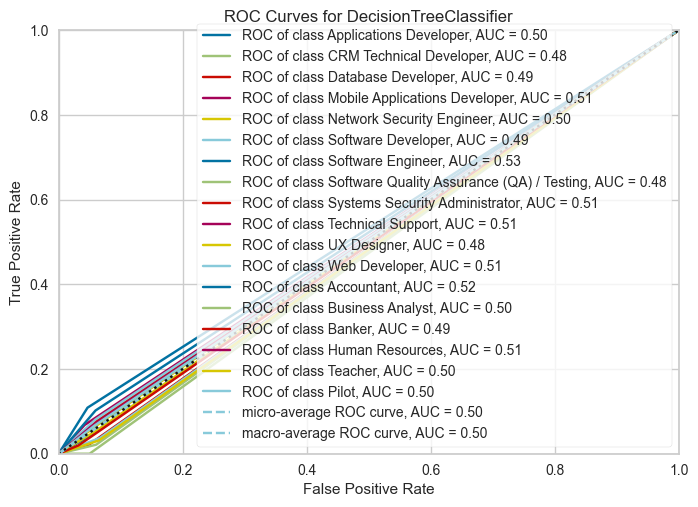

ROCAUC(ax=<AxesSubplot: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       classes=['Applications Developer', 'CRM Technical Developer',
                'Database Developer', 'Mobile Applications Developer',
                'Network Security Engineer', 'Software Developer',
                'Software Engineer',
                'Software Quality Assurance (QA) / Testing',
                'Systems Security Administrator', 'Technical Support',
                'UX Designer', 'Web Developer', 'Accountant',
                'Business Analyst', 'Banker', 'Human Resources', 'Teacher',
                'Pilot'],
       estimator=DecisionTreeClassifier(random_state=1))

In [66]:
dt = DecisionTreeClassifier(random_state=1)
roc_auc(dt, x_train, y_train, X_test = x_test, y_test = y_test, classes =['Applications Developer', 'CRM Technical Developer','Database Developer','Mobile Applications Developer','Network Security Engineer','Software Developer','Software Engineer','Software Quality Assurance (QA) / Testing','Systems Security Administrator','Technical Support','UX Designer','Web Developer','Accountant','Business Analyst','Banker','Human Resources','Teacher','Pilot'])

### ROC for KNN

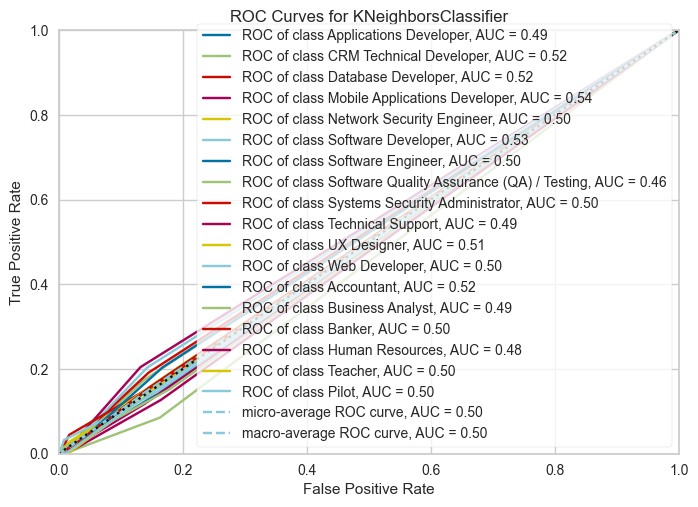

ROCAUC(ax=<AxesSubplot: title={'center': 'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       classes=['Applications Developer', 'CRM Technical Developer',
                'Database Developer', 'Mobile Applications Developer',
                'Network Security Engineer', 'Software Developer',
                'Software Engineer',
                'Software Quality Assurance (QA) / Testing',
                'Systems Security Administrator', 'Technical Support',
                'UX Designer', 'Web Developer', 'Accountant',
                'Business Analyst', 'Banker', 'Human Resources', 'Teacher',
                'Pilot'],
       estimator=KNeighborsClassifier(n_neighbors=3))

In [67]:
knn = KNeighborsClassifier(n_neighbors = 3)
roc_auc(knn, x_train, y_train, X_test = x_test, y_test = y_test, classes =['Applications Developer', 'CRM Technical Developer','Database Developer','Mobile Applications Developer','Network Security Engineer','Software Developer','Software Engineer','Software Quality Assurance (QA) / Testing','Systems Security Administrator','Technical Support','UX Designer','Web Developer','Accountant','Business Analyst','Banker','Human Resources','Teacher','Pilot'])

### ROC for Naive Bayes

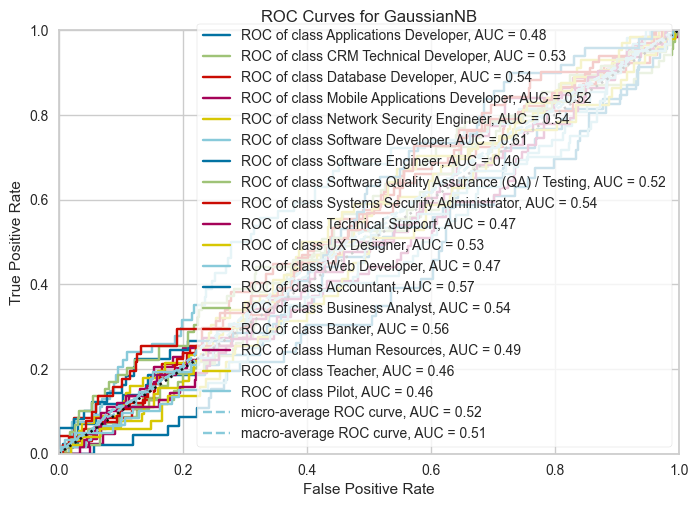

ROCAUC(ax=<AxesSubplot: title={'center': 'ROC Curves for GaussianNB'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       classes=['Applications Developer', 'CRM Technical Developer',
                'Database Developer', 'Mobile Applications Developer',
                'Network Security Engineer', 'Software Developer',
                'Software Engineer',
                'Software Quality Assurance (QA) / Testing',
                'Systems Security Administrator', 'Technical Support',
                'UX Designer', 'Web Developer', 'Accountant',
                'Business Analyst', 'Banker', 'Human Resources', 'Teacher',
                'Pilot'],
       estimator=GaussianNB())

In [68]:
classifier = GaussianNB()
roc_auc(classifier, x_train, y_train, X_test = x_test, y_test = y_test, classes =['Applications Developer', 'CRM Technical Developer','Database Developer','Mobile Applications Developer','Network Security Engineer','Software Developer','Software Engineer','Software Quality Assurance (QA) / Testing','Systems Security Administrator','Technical Support','UX Designer','Web Developer','Accountant','Business Analyst','Banker','Human Resources','Teacher','Pilot'])

### ROC for XGBOOST

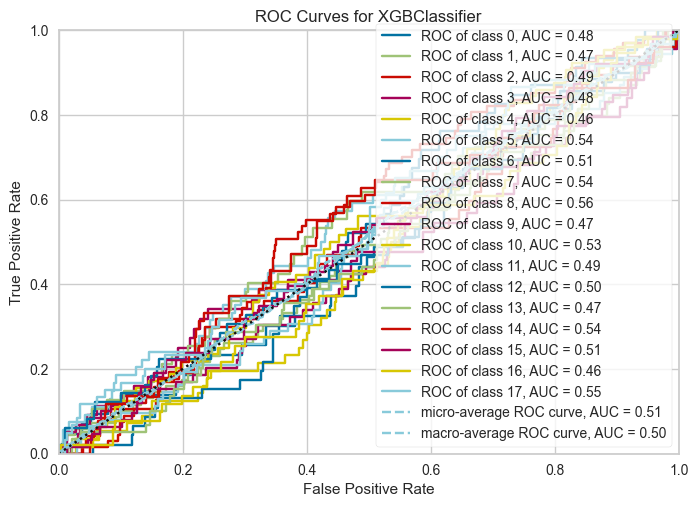

ROCAUC(ax=<AxesSubplot: title={'center': 'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       classes=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
                '12', '13', '14', '15', '16', '17'],
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, early_sto...
                               feature_types=None, gamma=0, gpu_id=-1,
                               grow_policy='depthwise', importance_type=None,
                               interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_threshold=64, max_cat_to_onehot=4,
                               max_delta_step=0, max_depth=6, max_leaves=0,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=0, num_parallel_tree=1,
                               objective='multi:softprob', predictor='auto', ...))

In [72]:
import xgboost as xgb
le = LabelEncoder()
y_train = le.fit_transform(y_train)
model = xgb.XGBClassifier()
roc_auc(model, x_train, y_train, X_test = x_test, y_test = y_test, classes =['0', '1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17'])

### ROC for SVM

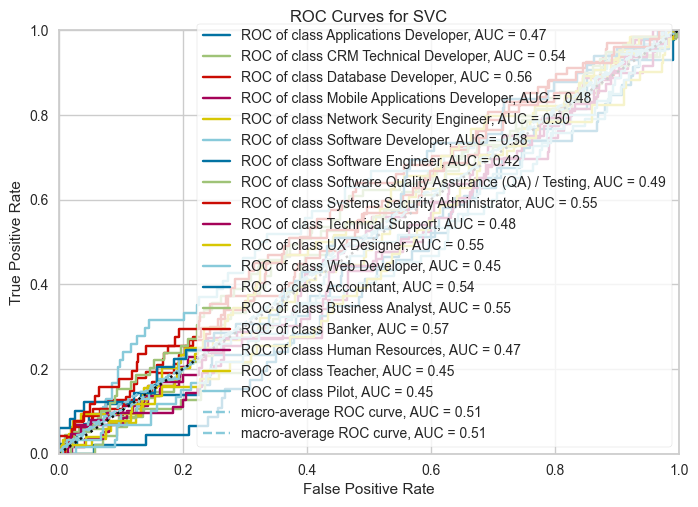

ROCAUC(ax=<AxesSubplot: title={'center': 'ROC Curves for SVC'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       classes=['Applications Developer', 'CRM Technical Developer',
                'Database Developer', 'Mobile Applications Developer',
                'Network Security Engineer', 'Software Developer',
                'Software Engineer',
                'Software Quality Assurance (QA) / Testing',
                'Systems Security Administrator', 'Technical Support',
                'UX Designer', 'Web Developer', 'Accountant',
                'Business Analyst', 'Banker', 'Human Resources', 'Teacher',
                'Pilot'],
       estimator=SVC(kernel='linear'))

In [74]:
from sklearn import svm
clf = svm.SVC(kernel='linear') # Linear Kernel
roc_auc(clf, x_train, y_train, X_test = x_test, y_test = y_test, classes =['Applications Developer', 'CRM Technical Developer','Database Developer','Mobile Applications Developer','Network Security Engineer','Software Developer','Software Engineer','Software Quality Assurance (QA) / Testing','Systems Security Administrator','Technical Support','UX Designer','Web Developer','Accountant','Business Analyst','Banker','Human Resources','Teacher','Pilot'])

## Classification Report using YellowBrick

### Random Forest

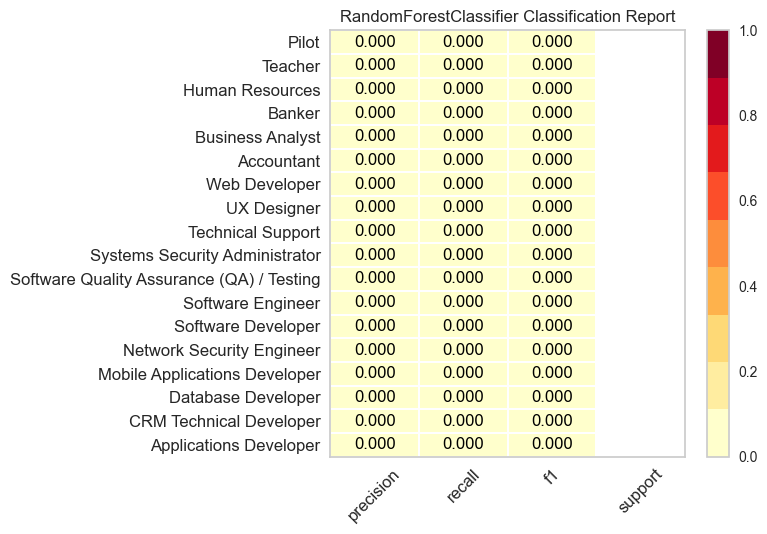

<AxesSubplot: title={'center': 'RandomForestClassifier Classification Report'}>

In [76]:
from yellowbrick.classifier import ClassificationReport
classes = ['Applications Developer', 'CRM Technical Developer','Database Developer','Mobile Applications Developer','Network Security Engineer','Software Developer','Software Engineer','Software Quality Assurance (QA) / Testing','Systems Security Administrator','Technical Support','UX Designer','Web Developer','Accountant','Business Analyst','Banker','Human Resources','Teacher','Pilot']
visualizer = ClassificationReport(rfc, classes = classes, support=True)
visualizer.fit(x_train, y_train)  # Fit the visualizer and the model
visualizer.score(x_test, y_test)  # Evaluate the model on the test data
visualizer.show() 

### Decision Tree

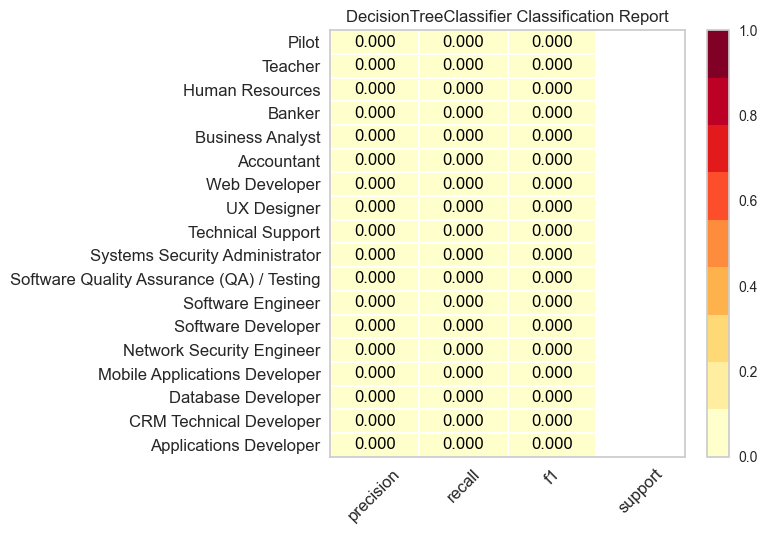

<AxesSubplot: title={'center': 'DecisionTreeClassifier Classification Report'}>

In [77]:
from yellowbrick.classifier import ClassificationReport
classes = ['Applications Developer', 'CRM Technical Developer','Database Developer','Mobile Applications Developer','Network Security Engineer','Software Developer','Software Engineer','Software Quality Assurance (QA) / Testing','Systems Security Administrator','Technical Support','UX Designer','Web Developer','Accountant','Business Analyst','Banker','Human Resources','Teacher','Pilot']
visualizer = ClassificationReport(dt, classes = classes, support=True)
visualizer.fit(x_train, y_train)  # Fit the visualizer and the model
visualizer.score(x_test, y_test)  # Evaluate the model on the test data
visualizer.show() 

### KNN

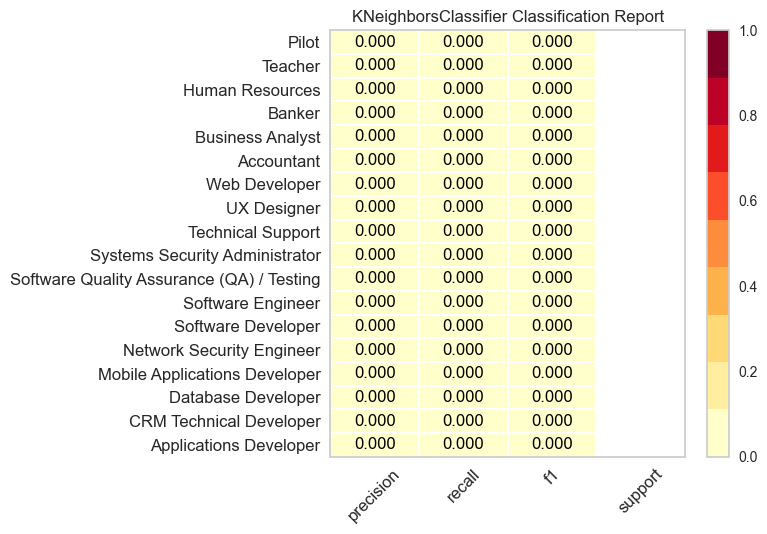

<AxesSubplot: title={'center': 'KNeighborsClassifier Classification Report'}>

In [78]:
from yellowbrick.classifier import ClassificationReport
classes = ['Applications Developer', 'CRM Technical Developer','Database Developer','Mobile Applications Developer','Network Security Engineer','Software Developer','Software Engineer','Software Quality Assurance (QA) / Testing','Systems Security Administrator','Technical Support','UX Designer','Web Developer','Accountant','Business Analyst','Banker','Human Resources','Teacher','Pilot']
visualizer = ClassificationReport(knn, classes = classes, support=True)
visualizer.fit(x_train, y_train)  # Fit the visualizer and the model
visualizer.score(x_test, y_test)  # Evaluate the model on the test data
visualizer.show() 

### Naive Bayes

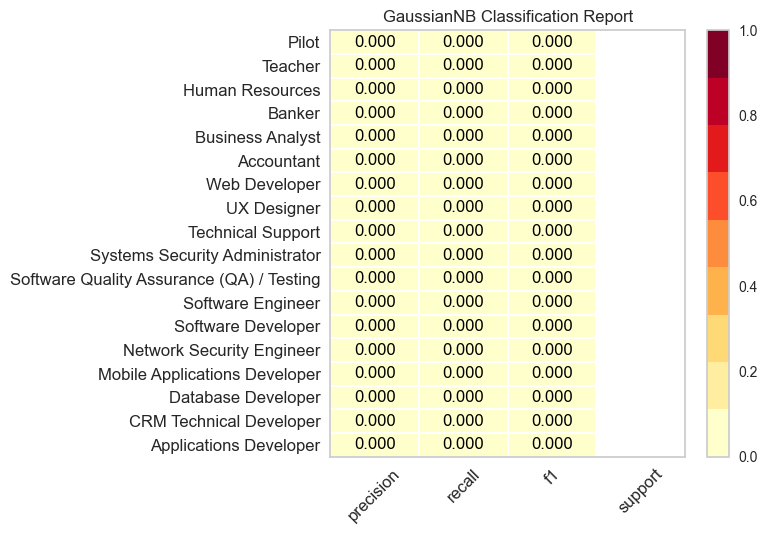

<AxesSubplot: title={'center': 'GaussianNB Classification Report'}>

In [79]:
from yellowbrick.classifier import ClassificationReport
classes = ['Applications Developer', 'CRM Technical Developer','Database Developer','Mobile Applications Developer','Network Security Engineer','Software Developer','Software Engineer','Software Quality Assurance (QA) / Testing','Systems Security Administrator','Technical Support','UX Designer','Web Developer','Accountant','Business Analyst','Banker','Human Resources','Teacher','Pilot']
visualizer = ClassificationReport(classifier, classes = classes, support=True)
visualizer.fit(x_train, y_train)  # Fit the visualizer and the model
visualizer.score(x_test, y_test)  # Evaluate the model on the test data
visualizer.show() 

In [38]:
import pickle 
pickle.dump(dtree,open('interest_profiler_model.pkl','wb'))

In [9]:

app = Flask(__name__)
# model = pickle.load(open("interest_profiler_model.pkl", "rb"))
@app.route("/predict_interest", methods = ["GET", "POST"])
@cross_origin()
def predictInterest():
    if request.method == "POST":    
      
        # Receive inputs from Post req
        content = request.json
        # print(content)

        model = pickle.load(open("interest_profiler_model.pkl", "rb"))

        prediction=model.predict([[
            content["Logical_quotient_rating"],
            content["i_get_stressed_out_easily"],
            content["coding_skills_rating"], 
            content["public_speaking_points"],
            content["i_am_always_prepared"],
            content["i_follow_a_schedule"], 
            content["i_am_quick_to_understand_things"],
            content["i_am_full_of_ideas"],
            content["i_start_conversations"], 
            content["do_you_like_sports"],
            content["entrepreneurial_mindset"], 
            content["tendency_to_worry"],
            content["self_learning_capability"], 
            content["Extra_courses_did"],
            content["Taken_inputs_from_seniors_or_elders"],
            content["reading_and_writing_skills"],
            content["memory_capability_score"], 
            content["worked_in_teams_ever"],
            content["Introvert"],
            content["B_hard_worker"],
            content["B_smart_worker"]
        ]])

        # print("===========================")
        # print(prediction)
        # print(prediction[0])
        # print("===========================")
            
        return prediction[0]
if __name__ == "__main__":
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

In [ ]:
from flask import Flask, request, render_template
from flask_cors import cross_origin
import sklearn
import pickle
import pandas as pd


app = Flask(__name__)
model = pickle.load(open("predict.pkl", "rb"))


@app.route("/")
@cross_origin()
def home():
    return render_template("home.html")

@app.route("/predict", methods = ["GET", "POST"])
@cross_origin()
def predict():
    if request.method == "POST":       

 ###################   Logical_quotient_rating   #################################        
        Logical_quotient_rating = request.form["Logical_quotient_rating"]
        if (Logical_quotient_rating == 1):
            Logical_quotient_rating = 1

        
        elif (Logical_quotient_rating == 2):
            Logical_quotient_rating = 2
        elif (Logical_quotient_rating == 3):
            Logical_quotient_rating = 3
        elif (Logical_quotient_rating == 4):
            Logical_quotient_rating = 4
        elif (Logical_quotient_rating == 5):
            Logical_quotient_rating = 5
        elif (Logical_quotient_rating == 6):
            Logical_quotient_rating = 6
        elif (Logical_quotient_rating == 7):
            Logical_quotient_rating = 7
        elif (Logical_quotient_rating == 8):
            Logical_quotient_rating = 8
        elif (Logical_quotient_rating == 9):
            Logical_quotient_rating = 9           


        else:
            Logical_quotient_rating = 0
            

            
 ###################   coding_skills_rating   #################################                    

        coding_skills_rating = request.form["coding_skills_rating"]
        if (coding_skills_rating == 1):
            coding_skills_rating = 1

        
        elif (coding_skills_rating == 2):
            coding_skills_rating = 2
        elif (coding_skills_rating == 3):
            coding_skills_rating = 3
        elif (coding_skills_rating == 4):
            coding_skills_rating = 4
        elif (coding_skills_rating == 5):
            coding_skills_rating = 5
        elif (coding_skills_rating == 6):
            coding_skills_rating = 6
        elif (coding_skills_rating == 7):
            coding_skills_rating = 7
        elif (coding_skills_rating == 8):
            coding_skills_rating = 8
        elif (coding_skills_rating == 9):
            coding_skills_rating = 9           


        else:
            coding_skills_rating = 0
            
 ###################   public_speaking_points   #################################                    

        public_speaking_points = request.form["public_speaking_points"]
        if (public_speaking_points == 1):
            public_speaking_points = 1

        
        elif (public_speaking_points == 2):
            public_speaking_points = 2
        elif (public_speaking_points == 3):
            public_speaking_points = 3
        elif (public_speaking_points == 4):
            public_speaking_points = 4
        elif (public_speaking_points == 5):
            public_speaking_points = 5
        elif (public_speaking_points == 6):
            public_speaking_points = 6
        elif (public_speaking_points == 7):
            public_speaking_points = 7
        elif (public_speaking_points == 8):
            public_speaking_points = 8
        elif (public_speaking_points == 9):
            public_speaking_points = 9           


        else:
            public_speaking_points = 0    
            
 ###################   self_learning_capability   #################################        
            
        self_learning_capability = request.form["self_learning_capability"]
        if (self_learning_capability == 'no'):
            self_learning_capability = 0

        
        elif (self_learning_capability == 'yes'):
            self_learning_capability = 1
        


        else:
            self_learning_capability = 0    
            
 ###################   Extra_courses_did   #################################                    
            
            
        Extra_courses_did = request.form["Extra_courses_did"]
        if (Extra_courses_did =='no' ):
            Extra_courses_did = 0

        
        elif (Extra_courses_did == 'yes'):
            Extra_courses_did = 1
                  


        else:
            Extra_courses_did = 0
            
 ###################   reading_and_writing_skills   #################################                
            
        reading_and_writing_skills = request.form["reading_and_writing_skills"]
        if (reading_and_writing_skills == 1):
            reading_and_writing_skills = 1        
        elif (reading_and_writing_skills == 2):
            reading_and_writing_skills = 2
        elif (reading_and_writing_skills == 0):
            reading_and_writing_skills = 0
                 


        else:
            reading_and_writing_skills = 0
            
 ###################   memory_capability_score   #################################               
            
        memory_capability_score = request.form["memory_capability_score"]
        if (memory_capability_score == 0):
            memory_capability_score = 0

        
        elif (memory_capability_score == 1):
            memory_capability_score = 1
        elif (memory_capability_score == 2):
            memory_capability_score = 2          


        else:
            memory_capability_score = 0  
 ###################   Taken_inputs_from_seniors_or_elders   #################################           
        Taken_inputs_from_seniors_or_elders = request.form["Taken_inputs_from_seniors_or_elders"]
        if (Taken_inputs_from_seniors_or_elders == 0):
            Taken_inputs_from_seniors_or_elders = 0
        
        elif (Taken_inputs_from_seniors_or_elders == 1):
            Taken_inputs_from_seniors_or_elders = 1     

        else:
            Taken_inputs_from_seniors_or_elders = 0 
            
###################   worked_in_teams_ever   #################################
        worked_in_teams_ever = request.form["worked_in_teams_ever"]
        if (worked_in_teams_ever == 0):
            worked_in_teams_ever = 0
        elif (worked_in_teams_ever == 1):
            worked_in_teams_ever = 1   
        else:
            worked_in_teams_ever = 0 

            
###################   interested_career_area   #################################         
                        
        interested_career_area = request.form["interested_career_area"]
        if (interested_career_area == 'Business process analyst'):
            interested_career_area_code = 0
        
        elif (interested_career_area == 'cloud computing'):
            interested_career_area_code = 1
            
        elif (interested_career_area == 'developer'):
            interested_career_area_code = 2 

        elif (interested_career_area == 'security'):
            interested_career_area_code = 3

        elif (interested_career_area == 'system developer'):
            interested_career_area_code = 4

        elif (interested_career_area == 'testing'):
            interested_career_area_code = 5

#         else:
#             interested_career_area_code = 0   
            
###################   Type_of_company_want_to_settle_in   #################################         
                        
        Type_of_company_want_to_settle_in = request.form["Type_of_company_want_to_settle_in"]
        if (Type_of_company_want_to_settle_in == 'BPA'):
            Type_of_company_want_to_settle_in_code = 0
        
        elif (Type_of_company_want_to_settle_in == 'Cloud Services'):
            Type_of_company_want_to_settle_in_code = 1
            
        elif (Type_of_company_want_to_settle_in == 'Finance'):
            Type_of_company_want_to_settle_in_code = 2 

        elif (Type_of_company_want_to_settle_in == 'Product based'):
            Type_of_company_want_to_settle_in_code = 3

        elif (Type_of_company_want_to_settle_in == 'SAaS services'):
            Type_of_company_want_to_settle_in_code = 4

        elif (Type_of_company_want_to_settle_in == 'Sales and Marketing'):
            Type_of_company_want_to_settle_in_code = 5

        elif (Type_of_company_want_to_settle_in == 'Service Based'):
            Type_of_company_want_to_settle_in_code = 6

        elif (Type_of_company_want_to_settle_in == 'Testing and Maintainance Services'):
            Type_of_company_want_to_settle_in_code = 7
        elif (Type_of_company_want_to_settle_in == 'Web Services'):
            Type_of_company_want_to_settle_in_code = 8 
        elif (Type_of_company_want_to_settle_in == 'product development'):
            Type_of_company_want_to_settle_in_code = 9
        else:
            Type_of_company_want_to_settle_in_code = 0 
            
###################   Interested_Type_of_Books   #################################   
            
        Interested_Type_of_Books = request.form["Interested_Type_of_Books"]
        if (Interested_Type_of_Books == 'Autobiographies'):
            Interested_Type_of_Books_code = 3
        elif (Interested_Type_of_Books == 'Series'):
            Interested_Type_of_Books_code = 28
        
        else:
            Interested_Type_of_Books_code = 28 
            
            
###################   hard_smart_worker   #################################   
            
        hard_smart_worker = request.form["hard_smart_worker"]
        if (hard_smart_worker == 'hard worker'):
            B_hard_worker = 1
            B_smart_worker= 0
        elif (hard_smart_worker == 'smart worker'):
            B_hard_worker = 0
            B_smart_worker= 1     
        else:
            B_hard_worker = 0
            B_smart_worker= 1  
            
###################   Management_or_Technical   #################################   
            
        Technical_or_Non_Technical = request.form["Technical_or_Non_Technical"]
        if (Technical_or_Non_Technical == 'Non Technical'):
            A_Non_Technical = 1
            A_Technical = 0
        elif (Technical_or_Non_Technical == 'Technical'):
            A_Management = 0
            A_Technical = 1   
        else:
            A_Management = 0
            A_Technical = 1   
###################   Introvert   #################################   
            
        Introvert = request.form["Introvert"]
        if (Introvert == 'no'):
            Introvert = 0
        elif (Introvert == 'yes'):
            Introvert = 1
  
        else:
             Introvert = 1         
             
###################   do_you_like_sports   #################################   
            
        do_you_like_sports = request.form["do_you_like_sports"]
        if (do_you_like_sports == 'no'):
            do_you_like_sports = 0
        elif (do_you_like_sports == 'yes'):
            do_you_like_sports = 1
  
        else:
             Introvert = 1                      
 ###################   entrepreneurial_mindset   #################################   
            
        entrepreneurial_mindset = request.form["entrepreneurial_mindset"]
        if (entrepreneurial_mindset == 'no'):
            entrepreneurial_mindset = 0
        elif (entrepreneurial_mindset == 'yes'):
            entrepreneurial_mindset = 1
  
        else:
             Introvert = 1      
 ###################   Introvert   #################################   
            
        tendency_to_worry = request.form["tendency_to_worry"]
        if (tendency_to_worry == 'no'):
            tendency_to_worry = 0
        elif (tendency_to_worry == 'yes'):
            tendency_to_worry = 1
  
        else:
             tendency_to_worry = 1        
  ###################   i_get_stressed_out_easily   #################################                    

        i_get_stressed_out_easily = request.form["i_get_stressed_out_easily"]
        if (i_get_stressed_out_easily == 1):
            i_get_stressed_out_easily = 1

        
        elif (i_get_stressed_out_easily == 2):
            i_get_stressed_out_easily = 2
        elif (i_get_stressed_out_easily == 3):
            i_get_stressed_out_easily = 3
        elif (i_get_stressed_out_easily == 4):
            i_get_stressed_out_easily = 4
        elif (i_get_stressed_out_easily == 5):
            i_get_stressed_out_easily = 5
        elif (i_get_stressed_out_easily == 6):
            i_get_stressed_out_easily = 6
        elif (i_get_stressed_out_easily == 7):
            i_get_stressed_out_easily = 7
        elif (i_get_stressed_out_easily == 8):
            i_get_stressed_out_easily = 8
        elif (i_get_stressed_out_easily == 9):
            i_get_stressed_out_easily = 9           


        else:
            i_get_stressed_out_easily = 0  
  ###################   i_am_always_prepared   #################################                    

        i_am_always_prepared = request.form["i_am_always_prepared"]
        if (i_am_always_prepared == 1):
            i_am_always_prepared = 1

        
        elif (i_am_always_prepared == 2):
            i_am_always_prepared = 2
        elif (i_am_always_prepared == 3):
            i_am_always_prepared = 3
        elif (i_am_always_prepared == 4):
            i_am_always_prepared = 4
        elif (i_am_always_prepared == 5):
            i_am_always_prepared = 5
        elif (i_am_always_prepared == 6):
            i_am_always_prepared = 6
        elif (i_am_always_prepared == 7):
            i_am_always_prepared = 7
        elif (i_am_always_prepared == 8):
            i_am_always_prepared = 8
        elif (i_am_always_prepared == 9):
            i_am_always_prepared = 9           


        else:
            i_am_always_prepared = 0  
    ###################   i_follow_a_schedule   #################################                    

        i_follow_a_schedule = request.form["i_follow_a_schedule"]
        if (i_follow_a_schedule == 1):
            i_follow_a_schedule = 1

        
        elif (i_follow_a_schedule == 2):
            i_follow_a_schedule = 2
        elif (i_follow_a_schedule == 3):
            i_follow_a_schedule = 3
        elif (i_follow_a_schedule == 4):
            i_follow_a_schedule = 4
        elif (i_follow_a_schedule == 5):
            i_follow_a_schedule = 5
        elif (i_follow_a_schedule == 6):
            i_follow_a_schedule = 6
        elif (i_follow_a_schedule == 7):
            i_follow_a_schedule = 7
        elif (i_follow_a_schedule == 8):
            i_follow_a_schedule = 8
        elif (i_follow_a_schedule == 9):
            i_follow_a_schedule = 9           


        else:
            i_follow_a_schedule = 0  
  ###################   i_am_quick_to_understand_things   #################################                    

        i_am_quick_to_understand_things = request.form["i_am_quick_to_understand_things"]
        if (i_am_quick_to_understand_things == 1):
            i_am_quick_to_understand_things = 1

        
        elif (i_am_quick_to_understand_things == 2):
            i_am_quick_to_understand_things = 2
        elif (i_am_quick_to_understand_things == 3):
            i_am_quick_to_understand_things = 3
        elif (i_am_quick_to_understand_things == 4):
            i_am_quick_to_understand_things = 4
        elif (i_am_quick_to_understand_things == 5):
            i_am_quick_to_understand_things = 5
        elif (i_am_quick_to_understand_things == 6):
            i_am_quick_to_understand_things = 6
        elif (i_am_quick_to_understand_things == 7):
            i_am_quick_to_understand_things = 7
        elif (i_am_quick_to_understand_things == 8):
            i_am_quick_to_understand_things = 8
        elif (i_am_quick_to_understand_things == 9):
            i_am_quick_to_understand_things = 9           


        else:
            i_am_quick_to_understand_things = 0  
  ###################   i_am_full_of_ideas   #################################                    

        i_am_full_of_ideas = request.form["i_am_full_of_ideas"]
        if (i_am_full_of_ideas == 1):
            i_am_full_of_ideas = 1

        
        elif (i_am_full_of_ideas == 2):
            i_am_full_of_ideas = 2
        elif (i_am_full_of_ideas == 3):
            i_am_full_of_ideas = 3
        elif (i_am_full_of_ideas == 4):
            i_am_full_of_ideas = 4
        elif (i_am_full_of_ideas == 5):
            i_am_full_of_ideas = 5
        elif (i_am_full_of_ideas == 6):
            i_am_full_of_ideas = 6
        elif (i_am_full_of_ideas == 7):
            i_am_full_of_ideas = 7
        elif (i_am_full_of_ideas == 8):
            i_am_full_of_ideas = 8
        elif (i_am_full_of_ideas == 9):
            i_am_full_of_ideas = 9           


        else:
            i_am_full_of_ideas = 0  
  ###################   i_start_conversations   #################################                    

        i_start_conversations = request.form["i_start_conversations"]
        if (i_start_conversations == 1):
            i_start_conversations = 1

        
        elif (i_start_conversations == 2):
            i_start_conversations = 2
        elif (i_start_conversations == 3):
            i_start_conversations = 3
        elif (i_start_conversations == 4):
            i_start_conversations = 4
        elif (i_start_conversations == 5):
            i_start_conversations = 5
        elif (i_start_conversations == 6):
            i_start_conversations = 6
        elif (i_start_conversations == 7):
            i_start_conversations = 7
        elif (i_start_conversations == 8):
            i_start_conversations = 8
        elif (i_start_conversations == 9):
            i_start_conversations = 9           


        else:
            i_start_conversations = 0  			
################################################################################################
      
            

        prediction=model.predict([[ 
Logical_quotient_rating,i_get_stressed_out_easily,coding_skills_rating,public_speaking_points,i_am_always_prepared,
i_follow_a_schedule,i_am_quick_to_understand_things,i_am_full_of_ideas,i_start_conversations,do_you_like_sports,
entrepreneurial_mindset,tendency_to_worry,self_learning_capability,Extra_courses_did,Taken_inputs_from_seniors_or_elders,
reading_and_writing_skills,memory_capability_score,worked_in_teams_ever,Introvert,interested_career_area_code,
Type_of_company_want_to_settle_in_code,Interested_Type_of_Books_code,A_Non_Technical,A_Technical,B_hard_worker,B_smart_worker 

#  Logical_quotient_rating, i_get_stressed_out_easily, coding_skills_rating, public_speaking_points, i_am_always_prepared,
#  i_follow_a_schedule, i_am_quick_to_understand_things, i_am_full_of_ideas, i_start_conversations, do_you_like_sports, 
#  entrepreneurial_mindset, tendency_to_worry, self_learning_capability, Extra_courses_did
#  Taken_inputs_from_seniors_or_elders,
#   reading_and_writing_skills, memory_capability_score, worked_in_teams_ever, Introvert, interested_career_area_code, 
#   Type_of_company_want_to_settle_in_code, Interested_Type_of_Books_code, A_Non_Technical, A_Technical, B_hard worker,
#    B_smart worker

            
        ]])

        output=(prediction[0],2)
        
        print(output)

    return render_template('home.html',prediction_text="The Course for you is. {}".format(output))


    return render_template("home.html")



if __name__ == "__main__":
     app.run(debug=True,use_reloader=False)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [28/Nov/2022 22:57:43] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [28/Nov/2022 22:57:43] "GET /static/css/styles.css HTTP/1.1" 304 -
c:\Users\rgons\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
127.0.0.1 - - [28/Nov/2022 22:57:46] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [28/Nov/2022 22:57:46] "GET /static/css/styles.css HTTP/1.1" 304 -


('Banker', 2)
